`PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more`

`
Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data
`

## How PCA works

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# generate and plot dummy data
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])

`
By eye, it is clear that there is a nearly linear relationship between the x and y variables. if we want to predict or find the the relation or coefficients between x and y we aim for the linear regression , but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values
`

#### In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # train PCA to find the first two principal axes of the data 
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

`The fit learns some quantities from the data, most importantly the "components" and "explained variance"
component is like vector and each vecor map into explained variance` 

In [10]:
print("main components \n {} ".format(pca.components_))
print("variance \n {} ".format(pca.explained_variance_))

main components 
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]] 
variance 
 [0.7625315 0.0184779] 


`To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector`

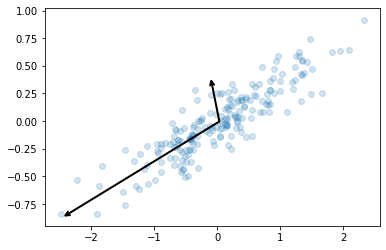

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

`These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data`

## PCA as dimensionality reduction

`from previous section , we can use pca while dealing with supervised problems , assume we have huge number of features that may lead model to overfit , we can use pca to select most import features/components from the data ,
but the qustion is how many number of components shall i use , its trial and error problem we may plot variance vs number of components`

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

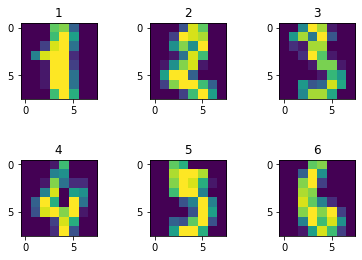

In [24]:
# plot sample of data
import matplotlib.pyplot as plt
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(np.reshape(digits.data[i],newshape=(8,8)))
    plt.title(digits.target[i])

`now in this problem we have feature vector of 64 features , assume that these number of features is very large , so we can use pca to reduce number of features`

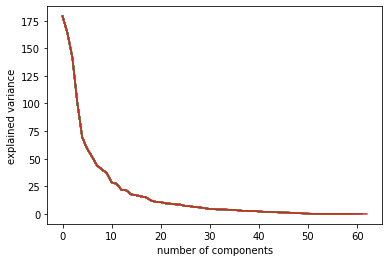

In [29]:
for c in range (64):
    pca = PCA(n_components=c).fit(digits.data)
    plt.plot(pca.explained_variance_) # changes components vs variance
    plt.xlabel('number of components')
    plt.ylabel('explained variance')

`This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance`

In [35]:
# after applying pca
digits_new=PCA(n_components=10).fit_transform(digits.data)
print("new features : {} ".format(digits_new.shape))

new features : (1797, 10) 
